## Feature extraction 

In [2]:
from jl_song_data import SongData 

In [12]:
data = SongData('../data/chords_clean_1_2_3_4_5_6.csv')

In [13]:
df = data.df

In [14]:
from jl_feature_extractor import FeatureExtractor    

feature_extractor = FeatureExtractor()

## Remove non valid chords 

This `eval` is to convert string column to array colum

In [15]:
df['chords'] = df['chords'].apply(eval)

In [16]:
from jl_chord_parser import ChordParser
parser = ChordParser()

Parse returns `None` if chord is not valid

In [18]:
df['chords'] = \
    df['chords'].apply(\
        lambda chords: [chord for chord in chords if parser.parse(chord) is not None] )\


##  Extract artist 

In [19]:
df['artist'] = df['url'].apply(feature_extractor.extract_pretty_artist)

In [20]:
df.sample(10)

,url,name,decade,genre,chords,uuid,artist
3674,https://tabs.ultimate-guitar.com/tab/elliott-s...,A Fond Farewell (ver 2),2000s,Folk,"[Am, C, G, Em, Bm, Cm, Am, C, G, Em, Am, C, G,...",cd9484ca-8c50-4a56-8550-e940d460079b,Elliott Smith
1275,https://tabs.ultimate-guitar.com/tab/bill_with...,Aint No Sunshine (ver 5),1970s,Rhythm And Blues,"[Am, Am, Em, G, Am, Am, Am, Em, G, Am, Em, Dm,...",356fa000-e819-48f4-ba6f-15e9b86735ca,Bill Withers
165,https://tabs.ultimate-guitar.com/tab/883/te_la...,Te La Tiri,1990s,Electronic,"[B, D, E, A, B, B, B, B, B, B, B, B, B, B, B, ...",026c97f3-305d-4e97-b32c-1448696f486d,883
7712,https://tabs.ultimate-guitar.com/tab/little-fe...,Willin,1970s,Rock,"[G, D, Em, C, G, C, C, C, G, G, D, Em, C, G, C...",416dec19-bfe8-41ea-b400-f1d2483ad6a5,Little Feat
10791,https://tabs.ultimate-guitar.com/tab/scissor_s...,Fire With Fire (ver 3),2010s,Disco,"[C, F, C, F, C, F, G, C, G, C, G, Am, F, G, C,...",a3ececd5-b9c8-41ce-9ff6-634eee0808ec,Scissor Sisters
9512,https://tabs.ultimate-guitar.com/tab/ozzy-osbo...,Goodbye To Romance (ver 3),1980s,Metal%%Metal,"[D, D/C#, Bm, A7, D, D/C#, Bm, F#m, G, Asus4, ...",2b0039cc-961e-4f98-bfb4-74654ff3acce,Ozzy Osbourne
7752,https://tabs.ultimate-guitar.com/tab/lorde/rib...,Ribs (ver 3),2010s,Pop,"[A, E, F#m, C#m, A, E, F#m, C#m, A, E, F#m, C#...",763b02b7-53ed-4088-a523-a093a998b6d7,Lorde
13729,https://tabs.ultimate-guitar.com/tab/weird_al_...,Jackson Park Express,2010s,Comedy,"[D, C, D, G, F, D, C, D, G, F, A, G, A, C, G, ...",6007716b-3849-4e89-ba78-14f49bf18f73,Weird Al Yankovic
6291,https://tabs.ultimate-guitar.com/tab/john-colt...,Giant Steps,1950s,Jazz,"[Bmaj7, D7, Gmaj7, Bb7, Ebmaj7, Am7, D7, Gmaj7...",0360d81f-c1dd-42d7-83e3-9127ab25c8f6,John Coltrane
5690,https://tabs.ultimate-guitar.com/tab/iron-maid...,Fear Of The Dark (ver 2),1990s,Metal%%Metal,"[Em, Em, C, C, D, D, C, D, Em, Em, C, C, D, D,...",15eb605a-2b0e-46d2-b381-b884c3387c89,Iron Maiden


## Extract decade as numeric 

In [21]:
df['decade'].unique()

array(['1980s', '2000s', '2010s', '1990s', '1960s', '1970s', '1950s'],
      dtype=object)

In [22]:
df['decade'] = df['decade'].apply(feature_extractor.extract_numeric_decade)

In [23]:
df['decade'].unique()

array([1980, 2000, 2010, 1990, 1960, 1970, 1950])

## Harmonics features 

We are going to extract all the harmonic features, i.e. related to chords. 

### Cardinality (number of chords) 

In [24]:
df['cardinality'] = df['chords'].apply(feature_extractor.extract_cardinality)

In [25]:
df.sample(10)

,url,name,decade,genre,chords,uuid,artist,cardinality
6663,https://tabs.ultimate-guitar.com/tab/johnny-ca...,Tennessee Stud,1990,Folk%%Country,"[A, A, G, A, E, A, A, G, A, E, A, A, G, A, D, ...",119a36dc-db49-4001-ac20-fa3057a3ac3f,Johnny Cash,38
12785,https://tabs.ultimate-guitar.com/tab/the_tempt...,Shakey Ground,1970,Rhythm And Blues,"[E, Em, D, E, Em, D, E, Em, D, E, Em, D, D, E,...",7b14628c-5569-4b7e-9aba-c428d1a6043b,The Temptations,78
5701,https://tabs.ultimate-guitar.com/tab/iron-maid...,Prodigal Son,1980,Metal,"[B, A, G, E, B, A, G, E, G, A, E, G, A, E, G, ...",d4b765b1-595a-4f12-8e53-a759b7eb6565,Iron Maiden,105
8545,https://tabs.ultimate-guitar.com/tab/metallica...,Nothing Else Matters (ver 2),1990,Metal,"[Em, D, Dsus4, Cadd2, Em, D, Csus2, Em, D, Csu...",c376eca8-1d72-4b08-975c-7b6092b4b5af,Metallica,124
1636,https://tabs.ultimate-guitar.com/tab/bob_marle...,Mellow Mood,1960,Reggae,"[C, F, C, G, C, F, C, G, C, F, C, G, C, F, C, ...",e414d73c-fb28-4eb8-a7a0-dffb3937a3af,Bob Marley,33
10996,https://tabs.ultimate-guitar.com/tab/shawn_men...,Life Of The Party (ver 3),2010,Rhythm And Blues%%Rhythm And Blues%%Pop,"[Em, G, C, D, Em, C, G, C, Em, G, C, D, Em, C,...",cf2df935-ee6b-49bc-8a2f-d0ea71f1c825,Shawn Mendes,89
9086,https://tabs.ultimate-guitar.com/tab/nelly/jus...,Just A Dream (ver 2),2010,Hip Hop%%Hip Hop,"[Em, C, G, D, Em, C, G, D, Em, C, G, D, Em, C,...",c4817194-75a4-4397-8daf-1b21c72a541c,Nelly,74
3487,https://tabs.ultimate-guitar.com/tab/dwight-yo...,Please Please Baby,1980,Country%%Country,"[E, E, A, E, A, E, A, E, B7, E, A, E, A, E, B7...",67360dbd-4f4c-48f8-96fb-5bcd2ad825fb,Dwight Yoakam,70
3121,https://tabs.ultimate-guitar.com/tab/dexys-mid...,Geno (ver 3),1980,Rhythm And Blues,"[C#, B, C#, B, C#, B, B, F#m, A, E, B, F#, C#,...",c6564d62-3391-41f3-9da7-139998df0405,Dexys Midnight Runners,56
644,https://tabs.ultimate-guitar.com/tab/all_sons_...,Oh How I Need You (ver 3),2010,Religious Music,"[G, D, Em, D, C, G, C, D, C, G, C, D, G, G, D,...",50f7d50e-09ca-469a-828e-67faac5ebdfd,All Sons Daughters,37


In [26]:
df['cardinality'].describe()

count    14114.000000
mean        85.521468
std         68.705570
min          0.000000
25%         51.000000
50%         77.000000
75%        108.000000
max       2020.000000
Name: cardinality, dtype: float64

In [27]:
df[df['cardinality'] == 0]

,url,name,decade,genre,chords,uuid,artist,cardinality
19,https://tabs.ultimate-guitar.com/tab/120815,Balladen Om Herr Fredrik Åkare Och Den Söta Fr...,1960,Jazz,[],752b3d65-297f-4777-acc4-e9d92e243a72,Unknown,0
160,https://tabs.ultimate-guitar.com/tab/883/cumul...,Cumuli,1990,Electronic,[],523bfc79-9f5d-4747-8db3-366bd5d32152,883,0
163,https://tabs.ultimate-guitar.com/tab/883/rotta...,Rotta X Casa Di Dio,1990,Electronic%%Electronic,[],8c8a69f6-7027-4816-a91d-d219d87582ca,883,0
217,https://tabs.ultimate-guitar.com/tab/abba/danc...,Dancing Queen (ver 3),1970,Pop,[],044a35a5-3943-49a5-bb6a-e0f5e19776cf,Abba,0
218,https://tabs.ultimate-guitar.com/tab/abba/danc...,Dancing Queen (ver 4),1970,Pop%%Pop%%Pop,[],bb8e839f-0d3f-40b6-9ee3-5fd4aa0301e1,Abba,0
...,...,...,...,...,...,...,...,...
12490,https://tabs.ultimate-guitar.com/tab/the_lonel...,Like A Boss,2000,Hip Hop,[],1a6d53ae-aeea-4bdd-a1e2-3100bbf3c88e,The Lonely Island,0
13107,https://tabs.ultimate-guitar.com/tab/tony_benn...,A Child Is Born,1970,Jazz,[],1dc741fc-51a9-40ef-a328-48eb8a467b62,Tony Bennett,0
13369,https://tabs.ultimate-guitar.com/tab/tyler_the...,Answer,2010,Hip Hop,[],8474fdc1-00c5-457a-9178-41b1bb48a21f,Tyler The Creator,0
13802,https://tabs.ultimate-guitar.com/tab/wham/free...,Freedom,1980,Rhythm And Blues%%Rhythm And Blues%%Rhythm And...,[],f0a72548-c85e-4848-bf60-af2e62993f5d,Wham,0


Some songs are been uploaded by user/ultimate guitar without including the special format for the chords, for example, in https://tabs.ultimate-guitar.com/tab/883/rotta-x-casa-di-dio-chords-89055. Let's remove them

In [28]:
df = df[df['cardinality'] != 0]

In [29]:
df['cardinality'].describe()

count    14043.000000
mean        85.953856
std         68.608710
min          1.000000
25%         51.000000
50%         77.000000
75%        108.000000
max       2020.000000
Name: cardinality, dtype: float64

The same occurs for songs with one or two chords (eg. https://tabs.ultimate-guitar.com/tab/mad-caddies/souls-for-sale-chords-837415)

In [30]:
df = df[df['cardinality'] != 1]

In [31]:
df = df[df['cardinality'] != 2]

In [32]:
df['cardinality'].describe()

count    14031.000000
mean        86.026014
std         68.593639
min          3.000000
25%         51.000000
50%         78.000000
75%        108.000000
max       2020.000000
Name: cardinality, dtype: float64

In [33]:
df['cardinality'].mode()

0    68
1    72
dtype: int64

Total number of chords

In [34]:
df['cardinality'].sum()

1207031

In [35]:
import matplotlib.pyplot as plt

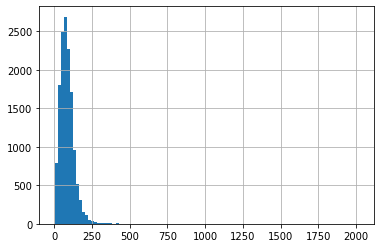

In [36]:
df['cardinality'].hist(bins=100)

### Unique cardinality (number of different chords) 

In [37]:
df['unique cardinality'] = df['chords'].apply(feature_extractor.extract_unique_cardinality)

In [38]:
df['unique cardinality'].describe()

count    14031.000000
mean         7.629606
std          5.418258
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max        101.000000
Name: unique cardinality, dtype: float64

Mode is 4...modern music is not very rich...

In [39]:
df['unique cardinality'].mode()

0    4
dtype: int64

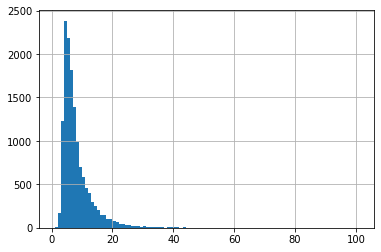

In [40]:
df['unique cardinality'].hist(bins=100)

In [41]:
pop = df[df['genre'].str.contains('Pop')]

In [42]:
jazz = df[df['genre'].str.contains('Jazz')]

In [43]:
pop['unique cardinality'].mode()

0    5
dtype: int64

In [44]:
jazz['unique cardinality'].mode()

0    6
dtype: int64

## Genre (to be improved) 

In [26]:
def remove_duplicate_genre_inside_cell(value):
    unique_genres = list(set(value.split('%%')))
    unique_genres.sort(key=str.lower)
    return '%%'.join(unique_genres)
    

df['genre'].apply(remove_duplicate_genre_inside_cell).unique()

array(['Folk', 'Folk%%Pop', 'Electronic', 'Classical%%Pop',
       'Electronic%%Pop', 'Jazz', 'Pop', 'Rock',
       'Contemporary R&b%%Rhythm And Blues', 'Rhythm And Blues',
       'World Music', 'Reggae', 'Metal', 'Hip Hop', 'Jazz%%Pop',
       'Hip Hop%%Rhythm And Blues', 'Jazz%%World Music', 'Disco',
       'Folk%%Jazz', 'Contemporary R&b', 'Electronic%%Rock',
       'Electronic%%Pop%%Rock', 'Disco%%Pop', 'Pop%%Rhythm And Blues',
       'Pop%%Rock', 'Contemporary R&b%%Hip Hop',
       'Religious Music%%Rhythm And Blues', 'Country', 'Folk%%Rock',
       'Blues', 'Contemporary R&b%%Electronic',
       'Electronic%%Rhythm And Blues', 'Folk%%Religious Music',
       'Religious Music', 'Pop%%Religious Music',
       'Jazz%%Rhythm And Blues', 'Contemporary R&b%%Pop', 'Metal%%Rock',
       'Darkwave', 'Blues%%Rock', 'Disco%%Pop%%Rock',
       'Folk%%Rhythm And Blues', 'Folk%%Pop%%Rock',
       'Disco%%Rhythm And Blues', 'Blues%%Rhythm And Blues',
       'Rhythm And Blues%%Rock', 'Country%%

## 